In [292]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import xarray as xr
import numpy as np

# Crooked Island RSL

In [293]:
# import Crooked water & land tide gauge readings
R1 = '/Users/rogercreel/Dropbox/Columbia_PhD/Research/LIG-MIS5E/Summer_2019/tide_gauge_data/Crooked_Island_water.csv'
R2 = '/Users/rogercreel/Dropbox/Columbia_PhD/Research/LIG-MIS5E/Summer_2019/tide_gauge_data/Crooked_Island_land.csv'


dfw = pd.read_csv(R1, header=1, usecols=[1,2,3], names=["time", 'pressure_psi', 'temp_F'], 
                 parse_dates=[1])
dfa = pd.read_csv(R2, header=1, usecols=[1,2,3], names=["time", 'pressure_psi', 'temp_F'],
                 parse_dates=[1])


# convert pressure into pascals (kg / m s**2)
dfw['pressure_pa'] = dfw['pressure_psi'].astype(float).values * 6894.75729
dfa['pressure_pa'] = dfa['pressure_psi'].astype(float).values * 6894.75729

dfa.head()

,time,pressure_psi,temp_F,pressure_pa
0,06/06/19 09:00:00 AM,14.8274,84.834,102231.324242
1,06/06/19 09:01:00 AM,14.8297,84.834,102247.182184
2,06/06/19 09:02:00 AM,14.8274,84.834,102231.324242
3,06/06/19 09:03:00 AM,14.8274,84.834,102231.324242
4,06/06/19 09:04:00 AM,14.8274,84.834,102231.324242


# Convert pressure to water depth
H(t): depth of measurement location <br>
ρ(t): pressure measured by sensor <br>
P<sub>a</sub>(t): atmospheric pressure at sea level <br>
ρ<sub>mean</sub>: sea water average density (function of temperature, salinity, pressure effect negligable) on height H & h(t) <br>
g: gravity

The pressure equals the sum of atmospheric pressure and hydrostatic pressure:
    
P(t) = P<sub>a</sub>(t) + ρ<sub>mean</sub>g[H + h(t)]

Height of water above pressure sensor:

H(t) = [P(t) - P<sub>a</sub>(t)]/ρ<sub>mean</sub>g

Crooked Island mean water depth above sensor =  0.5414656778118109 m


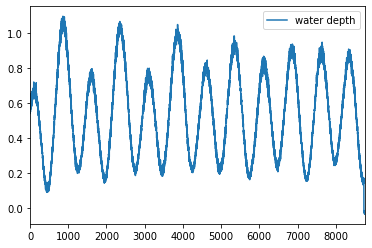

In [294]:
L = 22.804720944 #(latitude)
ρmean = 1023.5 #kg/m**2
g = 9.7803185 *(1+(0.005302357*np.sin(L)**2)-0.0000059*np.sin(2*L)**2) # m/s²
pa_t = dfa.pressure_pa
p_t = dfw.pressure_pa
H = (p_t - pa_t)/(ρmean*g) # in meters
dfh = pd.DataFrame(H).rename(columns={'pressure_pa':'water depth'})
print('Crooked Island mean water depth above sensor = ',dfh.mean()[0], 'm')
dfh.plot();

In [295]:
path = '/Users/rogercreel/Dropbox/Columbia_PhD/Research/LIG-MIS5E/Summer_2019/notebooks/gps_bahamas2019'
dfgps = pd.read_csv(path).set_index('ID')

# subset crooked island & long island
dfcr = pd.concat([dfgps.loc[:104],dfgps.loc[181:]]) 
dfli = dfgps.loc[105:180]

# landrail tide gauge diff gps measurements:
tg1 = dfgps[['Height']].loc[189] - 2.37
tg2 = dfgps[['Height']].loc[190] - 2.37
tg3 = dfgps[['Height']].loc[104] - 2.40
tg_lr = (tg1 + tg2 + tg3)/3

# insert Crooked GPS correction factor 
rsl_raw = tg_lr[0] + dfh.mean()[0]
ht_cor_cr = dfcr[['Height']] - rsl_raw
print('Crooked Island RSL gps correction factor = ', rsl_raw)

dfcr_ed = dfcr
dfcr_ed.insert(3, "height_corrected", ht_cor_cr)
dfcr_ed.head()

Crooked Island RSL gps correction factor =  -35.91759765552151


,Longitude,Latitude,Height,height_corrected,Comment,Max_PDOP,Max_HDOP,Corr_Type,Rcvr_Type,GPS_Date,GPS_Time,Update_Sta,Feat_Name,Datafile,Unfilt_Pos,Filt_Pos,Data_Dicti,GPS_Week,GPS_Second,GNSS_Heigh,Vert_Prec,Horz_Prec,Std_Dev,Point_ID
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,-74.304040,22.763469,-31.81528,4.102318,b1104 gcp a,2.0,1.1,Real-time Code,ProXRT,6/7/2019,04:04:01pm,New,Point_ge,060719.ssf,423,423,Generic,2056,504257.0,-31.81528,0.56162,0.45111,0.170007,1
2,-74.304041,22.763468,-31.85956,4.058038,b1104 gcp a retake,2.0,1.1,Real-time Code,ProXRT,6/7/2019,04:11:08pm,New,Point_ge,060719.ssf,181,181,Generic,2056,504684.0,-31.85956,0.35468,0.28704,0.031556,2
3,-74.303984,22.763399,-32.02412,3.893478,b1104 gcp b,2.0,1.1,Real-time Code,ProXRT,6/7/2019,04:15:23pm,New,Point_ge,060719.ssf,193,193,Generic,2056,504939.0,-32.02412,0.32834,0.25654,0.050902,3
4,-74.304032,22.763360,-33.07732,2.840278,b1104 gcp c,1.8,1.0,Real-time Code,ProXRT,6/7/2019,04:19:48pm,New,Point_ge,060719.ssf,184,184,Generic,2056,505204.0,-33.07732,0.31532,0.22917,0.035067,4
5,-74.304135,22.763420,-33.19058,2.727018,b1104 gcp d,2.6,1.3,Real-time Code,ProXRT,6/7/2019,04:25:17pm,New,Point_ge,060719.ssf,205,205,Generic,2056,505533.0,-33.19058,0.30238,0.19986,0.033284,5


# Long Island RSL 

In [296]:
# import Long Island water tide gauge readings
R1 = '/Users/rogercreel/Dropbox/Columbia_PhD/Research/LIG-MIS5E/Summer_2019/tide_gauge_data/Long_Island_water.csv'
R2 = '/Users/rogercreel/Dropbox/Columbia_PhD/Research/LIG-MIS5E/Summer_2019/tide_gauge_data/Long_Island_land.csv'

dfw = pd.read_csv(R1, header=1, usecols=[1,2,3], names=["time", 'pressure_psi', 'temp_F'], 
                 parse_dates=[1]).loc[1600:]
dfa = pd.read_csv(R2, header=1, usecols=[1,2,3], names=["time", 'pressure_psi', 'temp_F'], 
                 parse_dates=[1]).loc[1602:]

# convert pressure into pascals (kg / m s**2)
dfw['pressure_pa'] = dfw['pressure_psi'].astype(float).values * 6894.75729
dfa['pressure_pa'] = dfa['pressure_psi'].astype(float).values * 6894.75729

Long Island mean water height above sensor =  0.6032855709941245 m


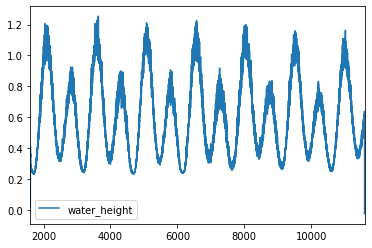

In [297]:
# Calculate mean water height
L = dfli[['Height']].loc[117][0] # latitude
ρmean = 1023.5 #kg/m**2
g = 9.7803185 *(1+(0.005302357*np.sin(L)**2)-0.0000059*np.sin(2*L)**2) # m/s²
pa_t = dfa.pressure_pa
p_t = dfw.pressure_pa
H = (p_t - pa_t)/(ρmean*g) # in meters
dfh = pd.DataFrame(H).rename(columns={'pressure_pa':'water_height'})

print('Long Island mean water height above sensor = ',dfh.mean()[0], 'm')
dfh.plot();

In [298]:
#calculate Long Island gps correction factor 
tg = dfli[['Height']].loc[117][0] + 0.22
rsl_raw = tg + dfh.mean()[0]
ht_cor_cr = dfli[['Height']] - rsl_raw
print('Long Island RSL gps correction factor = ', rsl_raw)

dfli_ed = dfli
dfli_ed.insert(3, "height_corrected", ht_cor_cr)
dfli_ed.head()

Long Island RSL gps correction factor =  -33.520974429005875


,Longitude,Latitude,Height,height_corrected,Comment,Max_PDOP,Max_HDOP,Corr_Type,Rcvr_Type,GPS_Date,GPS_Time,Update_Sta,Feat_Name,Datafile,Unfilt_Pos,Filt_Pos,Data_Dicti,GPS_Week,GPS_Second,GNSS_Heigh,Vert_Prec,Horz_Prec,Std_Dev,Point_ID
ID,,,,,,,,,,,,,,,,,,,,,,,,
105,-75.272090,23.604404,-31.77864,1.742334,b1119 gcp a,1.5,0.9,Real-time Code,ProXRT,6/13/2019,12:20:28pm,New,Point_ge,june 13 2019.ssf,501,501,Generic,2057,404444.0,-31.77864,0.08420,0.12471,0.045749,105
106,-75.272032,23.604268,-31.11822,2.402754,b1119 gcp b,1.5,0.9,Real-time Code,ProXRT,6/13/2019,12:31:42pm,New,Point_ge,june 13 2019.ssf,296,296,Generic,2057,405118.0,-31.11822,0.05771,0.07782,0.015157,106
107,-75.272171,23.604345,-30.14861,3.372364,b1119 gcp c,1.5,0.9,Real-time Code,ProXRT,6/13/2019,12:38:03pm,New,Point_ge,june 13 2019.ssf,200,200,Generic,2057,405499.0,-30.14861,0.05157,0.06468,0.010986,107
108,-75.272185,23.604492,-30.99697,2.524004,b1119 gcp d,1.6,0.8,Real-time Code,ProXRT,6/13/2019,12:43:00pm,New,Point_ge,june 13 2019.ssf,347,347,Generic,2057,405796.0,-30.99697,0.04451,0.05354,0.014033,108
109,-75.271987,23.604452,-32.51482,1.006154,b1119 gcp e,1.5,0.8,Real-time Code,ProXRT,6/13/2019,12:51:07pm,New,Point_ge,june 13 2019.ssf,439,439,Generic,2057,406283.0,-32.51482,0.03886,0.04407,0.010585,109
